# 1. How to Run in Google Colab

To access free GPU and acceslerate computations, it's recommended run the jupyter notebook in **Google Colab**.

**Steps to Run in Google Colab**
1. Open Google [Colaboratory](https://colab.research.google.com/) in your browser
2. Click on the **“Upload”** button.
3. Drag and drop the downloaded notebook or click to browse and select the notebook file from your computer.
4. Wait for the notebook to load in Colab, and you're ready to run it! 🚀

**Enable GPU for Faster Computation**

1. Click on "Runtime" in the top menu.
2. Select "Change runtime type".
3. In the popup window, under "Hardware accelerator", choose available GPU type.
4. Click "Save", and your notebook will now run with GPU support!

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 2. Introduction to TensorFlow for CNNs

TensorFlow is a leading deep learning framework that simplifies building CNNs. CNNs excel at image tasks due to:  
- **Convolutional Layers**: Detect spatial patterns (edges, textures).  
- **Pooling Layers**: Reduce dimensionality while preserving features.  
- **Hierarchical Learning**: Combine low-level features (edges) into high-level concepts (objects).  

We’ll use `tf.keras`, TensorFlow’s high-level API for intuitive model design.  



In [2]:
# Importing Dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# 3. Dataset preprocessing

## Loading the Cifar10 dataset
In this lectorial, we will use CIFAR10 dataset.

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


## Image normalization

In digital images, pixel values are typically integers ranging from 0 to 255.

**Normalization** scales these values to be between 0 and 1 by dividing by 255.

In [5]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test = X_test / 255.0

## Visualize a sample image with label


Text(0.5, 1.0, 'truck')

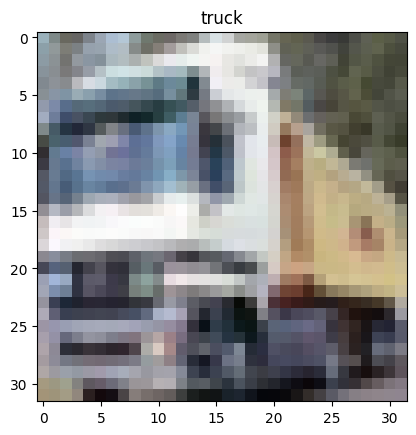

In [24]:
plt.imshow(X_train[1])
plt.title(class_names[y_train[1][0]])

# 4. Building the Convolutional Neural Network (CNN)


CNN is made of 3 main layers, in sequential order:

* **Convolutional layer (extract features using filters)**
  - Low-level features (e.g., lines, edges).
  - High-level features (e.g., face, ear, nose) for image recognition.
* **Pooling layer (Feature Map Compression)**
  - Shrinks feature maps to reduce computation.
  - Keeps essential details for recognition.
* **Fully connected layer**: matches the compressed features maps to their labels.

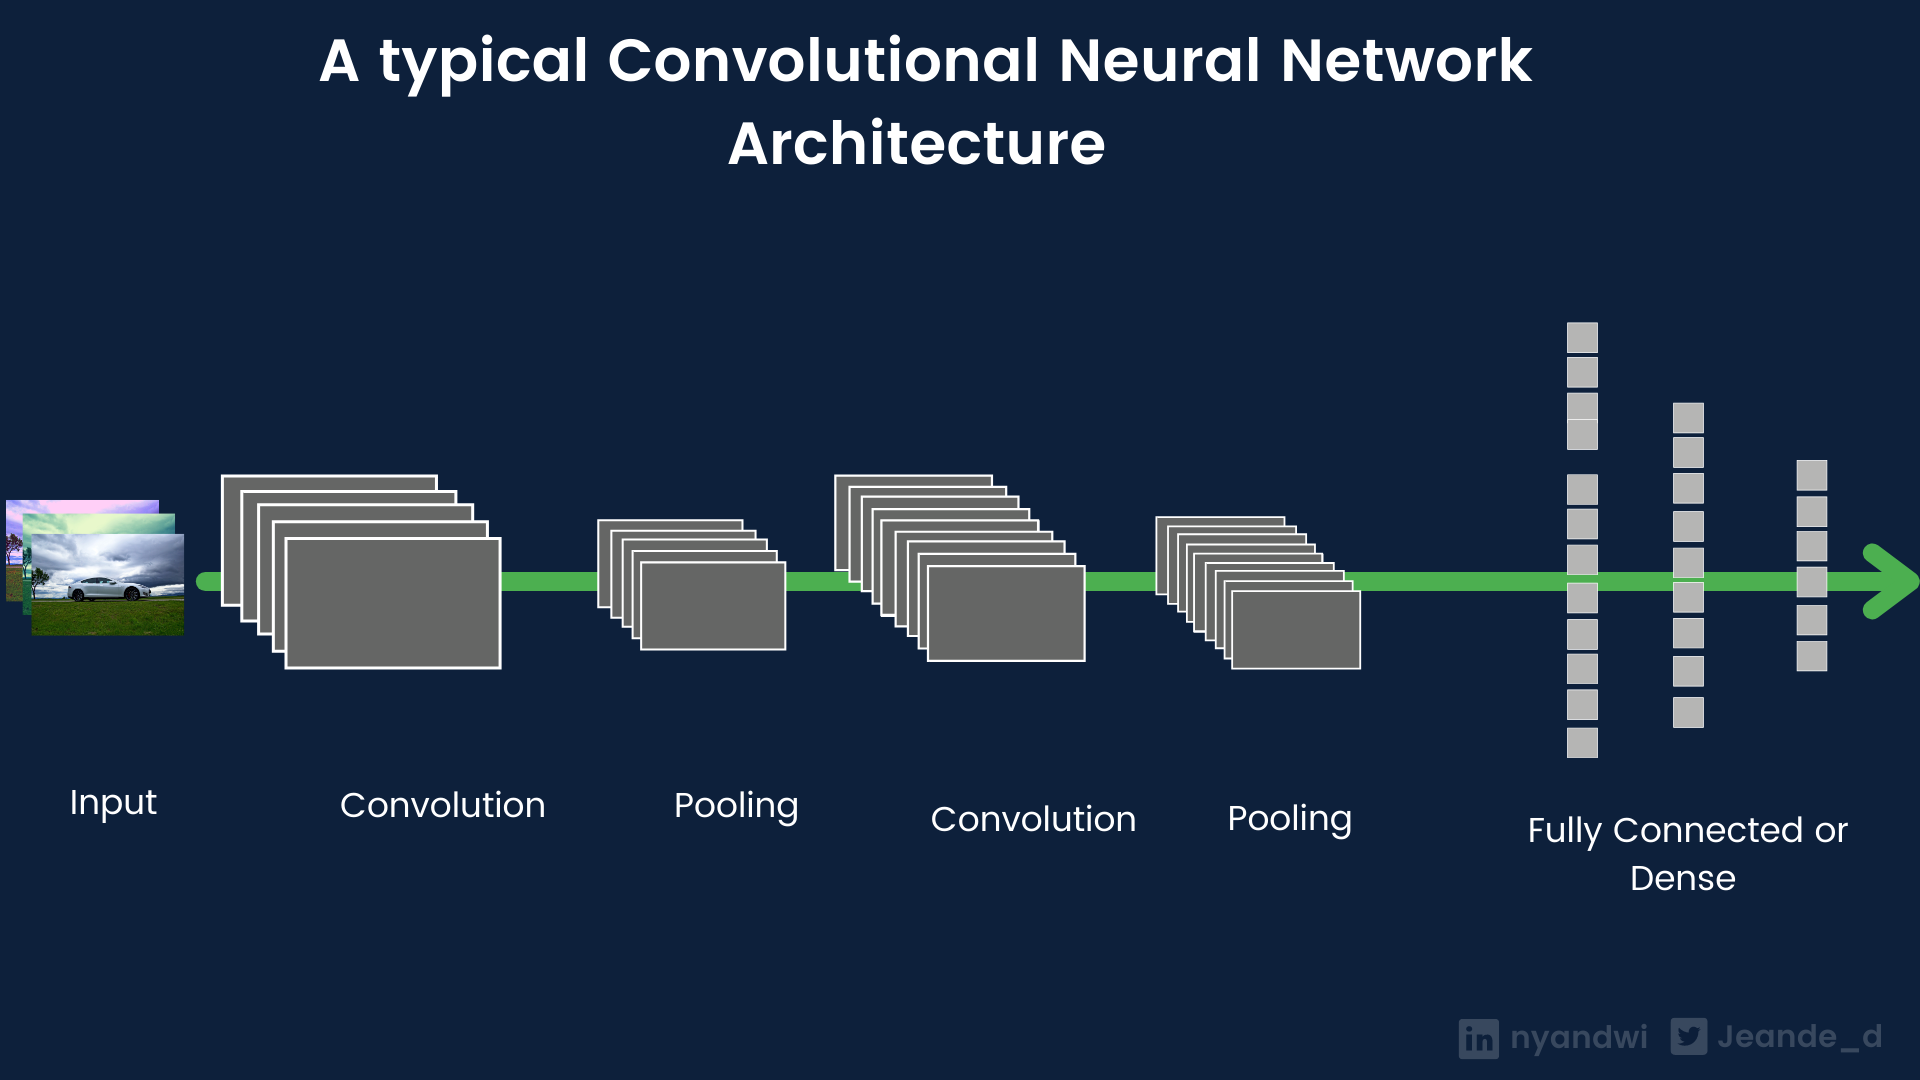


Now, let's explore how to build CNN layers with codes.

## 4.1 Defining the model

In [9]:
model = models.Sequential()

## 4.2 Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size: (3, 3)
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


**Understanding Padding:**

**Padding** adds extra pixels (usually zeros) around the input image before applying convolution. This helps in:

✅ Preserving spatial dimensions (e.g., 'same' padding keeps the output size equal to the input).

✅ Reducing information loss at the edges.

✅ Controlling the size of the output.
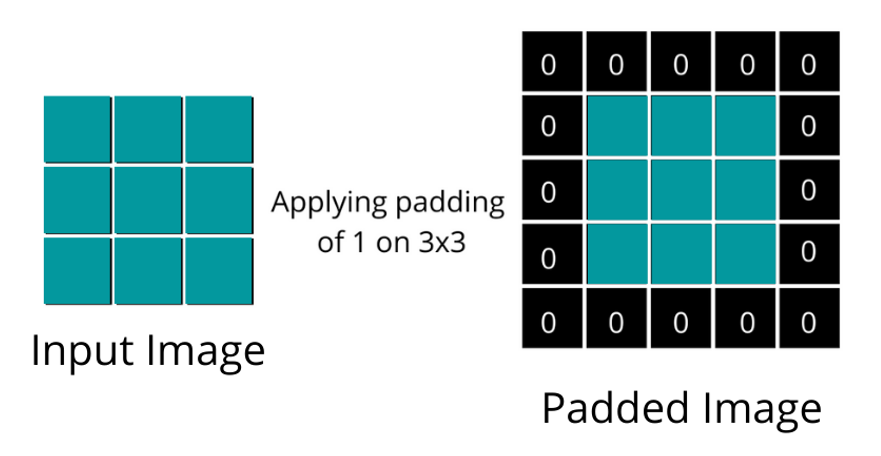

Common Padding Types:
- Same Padding ('same') – Ensures the output has the - same dimensions as the input.
- Valid Padding ('valid') – No padding, leading to a smaller output

YouTube Video: [Padding in CNN](https://www.youtube.com/watch?v=-1xVmU8Z6Bs&t=232s)


In [10]:
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))

## 4.3 Adding the first max pool layer

**Max Pooling** is a pooling operation that calculates the **maximum value** for patches of a feature map, and uses it to create a downsampled (pooled) feature map.

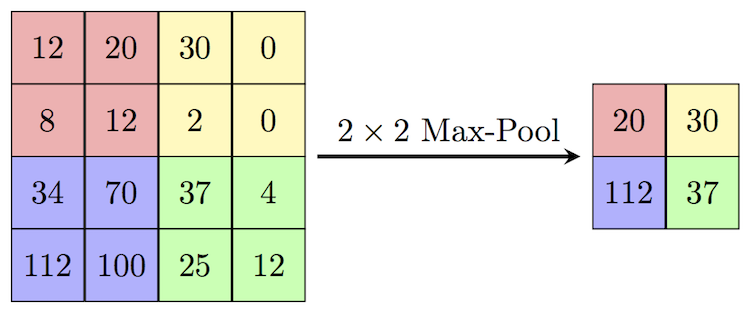

MaxPool layer hyper-parameters:
- pool_size: (2, 2)
- strides: 2
- padding: valid

**Understanding Stride in MaxPooling:**

**Stride** determines how much the filter moves across the input:

- Stride = 1: The filter moves pixel by pixel (default setting).
- Stride > 1: The filter moves by multiple pixels, reducing the output size and computation cost.

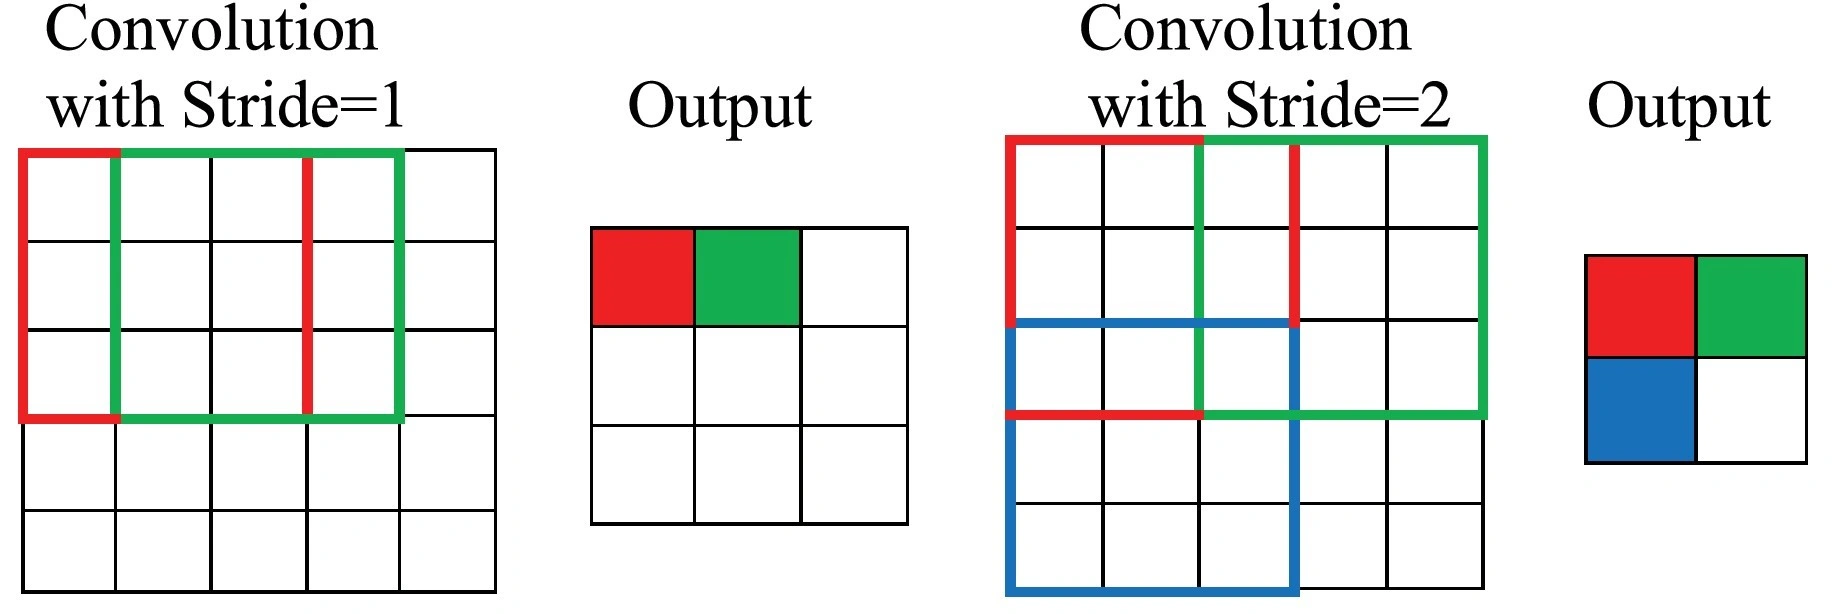

In [11]:
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

## 4.4 Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:

- filters: 64
- kernel_size: (3, 3)
- padding: same
- activation: relu

MaxPool layer hyper-parameters:

- pool_size: (2, 2)
- strides: 2
- padding: valid

In [12]:
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

In [13]:
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

Let's display the architecture of your model so far:

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 19,392 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., filters = 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

---
To complete the model, you will feed the last output tensor from the convolutional base (of shape (8, 8, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

## 4.5 Adding the Flatten layer

In [15]:
model.add(layers.Flatten())

## 4.6 Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [16]:
model.add(layers.Dense(units=128, activation='relu'))

## 4.7 Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [17]:
model.add(layers.Dense(units=10, activation='softmax'))

Here's the complete architecture of your model:

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

The network summary shows that (8, 8, 64) outputs were flattened into vectors of shape (4096) before going through two Dense layers.

---
You can also define all the layers above in a single step by wrapping them in a Sequential model:

```python
model = models.Sequential([
    # First Conv-Pool Block
    layers.Conv2D(filters=32, kernel_size=(3, 3),  
                   padding="same", activation="relu",
                   input_shape=(32, 32, 3)),
    layers.MaxPool2D(pool_size=(2, 2),  
                   strides=2, padding='valid'),
    
    # Second Conv-Pool Block
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                   padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2, 2),
                   strides=2, padding='valid'),
    
    # Classification Head
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # units= is optional
    layers.Dense(10, activation='softmax')
])
```

## 4.8 Compiling the model

**SparseCategoricalCrossentropy** is used when:
You have multiple classes (e.g., class labels: 0, 1, 2, 3, ...).
- The labels are integers (not one-hot encoded).

**from_logits**:
- Use `from_logits=False`(default value) when the model’s final layer includes `softmax` (e.g., `Dense(10, activation='softmax')` instead of `Dense(10)`).
- If the final layer does not have softmax, set `from_logits=True.`

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## 4.9 Training the model
1. epochs=5
    - An epoch refers to one complete pass of the entire training dataset through the model.
    - If you set `epochs=5`, it means the model will go through the entire dataset five times, updating its weights after each pass.

    - More epochs = more learning, but risk of overfitting

2. batch_size=64
    - The batch size determines how many samples the model processes before updating the weights.
    - If `batch_size=64`, the model will take 64 samples at a time, compute their gradients, and update the weights.

    - Smaller batches → more frequent updates, larger batches → faster training

3. validation_split=0.2:
    - The validation split is the fraction of training data reserved for validation.
    - Uses 20% of training data (10,000 images) as validation set

In [20]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64,  validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3653 - loss: 1.7370 - val_accuracy: 0.5657 - val_loss: 1.2280
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5849 - loss: 1.1715 - val_accuracy: 0.6256 - val_loss: 1.0646
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6565 - loss: 0.9810 - val_accuracy: 0.6481 - val_loss: 1.0032
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6982 - loss: 0.8652 - val_accuracy: 0.6630 - val_loss: 0.9806
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7272 - loss: 0.7851 - val_accuracy: 0.6791 - val_loss: 0.9207


## 4.10 Model evaluation and prediction

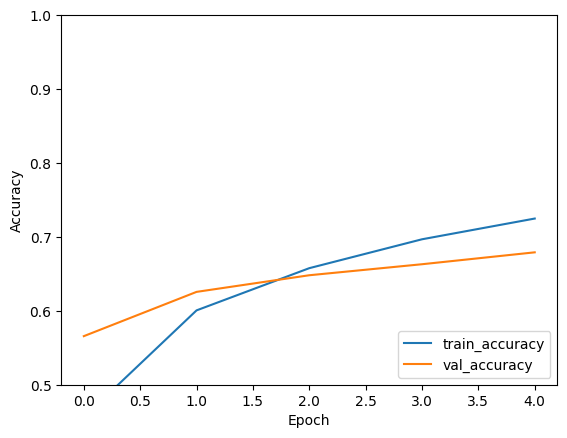

In [21]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6860 - loss: 0.9040
Test accuracy: 0.6797999739646912


# 5. Practice: Enhancing Model Performance

- (1) Increase epochs to 20

- (2) Add dropout for regularization
  - Dropout is a regularization technique used to prevent overfitting in neural networks. It works by randomly "dropping out" (setting to zero) a percentage of neurons during training, forcing the network to learn more robust features.
  - **How to Add Dropout to CNN?**

    Dropout is typically added after fully connnected (Dense) Layers. The coding line is:
    ```python
    model.add(layers.Dropout(0.3))
    ```


- (3) Experiment with Different Optimizers and Learning Rates

   The choice of optimizer and learning rate significantly affects how fast and well the model learns. Let’s try different configurations:
  - for example:
    
    **a. Stochastic Gradient Descent (SGD) with Momentum**
    ```python
    from tensorflow.keras.optimizers import SGD
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), ...)
    ```
     Momentum helps smooth out updates and can accelerate convergence.
    or

    **b. Adam Optimizer** (Adaptive Learning)
    ```python
    from tensorflow.keras.optimizers import Adam
    model.compile(optimizer=Adam(learning_rate=0.0005), ...)
    ```
    Adam adapts learning rates for each parameter, often leading to faster convergence.

 **Apply These Changes and Evaluate Performance:**

 - Train the updated model with increased epochs, dropout, and different optimizers.
 - Compare the accuracy, loss, and validation performance with the original model.
 - Observe if the model generalizes better

<details>
  <summary>Click to reveal the sample solution </summary>
  
  ```python
  model_pc = models.Sequential()

  model_pc.add(layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3)))
  model_pc.add(layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
  model_pc.add(layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))
  model_pc.add(layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
  model_pc.add(layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
  model_pc.add(layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))
  model_pc.add(layers.Flatten())
  model_pc.add(layers.Dense(units=128,activation="relu"))
  model.add(layers.Dropout(0.3))
  model_pc.add(layers.Dense(units=10,activation="softmax"))

  model_pc.summary()
  ```

<details>
  <summary>Click to reveal the sample solution</summary>
  
  ```python
  from tensorflow.keras.optimizers import Adam

  model_pc.compile(
      optimizer=Adam(learning_rate=0.0005),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy']
  )

  model_pc.fit(X_train,y_train,epochs=20)
```

<details>
  <summary>Click to reveal the sample solution</summary>
  
  ```python
  test_loss_pc,test_accuracy_pc= model_pc.evaluate(X_test,y_test)
  print("Test accuracy: {}".format(test_accuracy_pc))
```

## **Additional Resource**:
[TensorFlow Core Guide](https://www.tensorflow.org/guide)

Official documentation for building models, layers, and training loops.